In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import monai
from monai.visualize import blend_images, matshow3d, plot_2d_or_3d_image
from itkwidgets import view

from torch.utils.tensorboard import SummaryWriter

2023-04-16 11:40:23.889764: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 11:40:24.519871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Revalant examples and documentation
# https://github.com/Project-MONAI/tutorials/blob/main/modules/transform_visualization.ipynb
# https://docs.monai.io/en/stable/index.html
# https://github.com/Project-MONAI/MONAI/blob/main/monai/visualize/img2tensorboard.py
# https://github.com/KitwareMedical/tensorboard-plugin-3d

In [3]:
data_npz = "/home/bryan/data/brain_tumor/caidm_3d_96/data.npz"
data_dir = "/home/bryan/data/brain_tumor/caidm_3d_96"

In [4]:
log_dir = "/home/bryan/expr/scratch/2023-04-16"

In [5]:
data = np.load(data_npz)
t2w = np.array(data['t2w'])
lbl = np.array(data['lbl'])

In [6]:
t2w.shape # NDHWC
t2w = np.transpose(t2w, axes=(0, 4, 2,3,1)) # NCHWD where C=1, and D=48 3D depth channels
t2w.shape

(565, 1, 96, 96, 48)

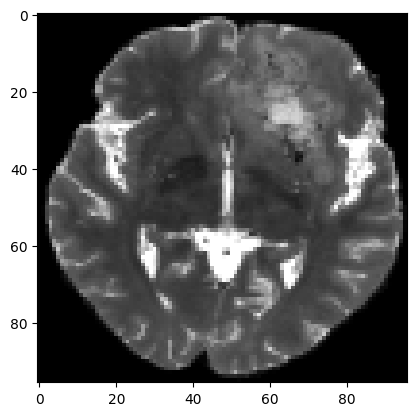

In [7]:
plt.imshow(t2w[0,0,...,20], cmap="gray")

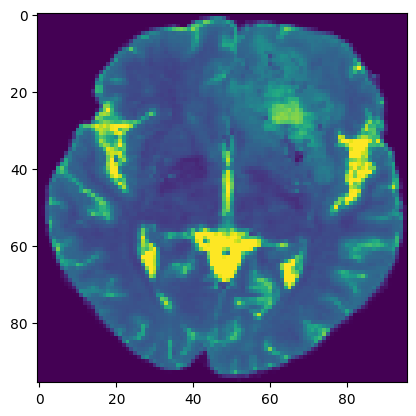

In [8]:
# Example for how to rescale image from to 0, 255
from monai.transforms import rescale_array
rescaled = rescale_array(t2w[0,0], 0, 255)
plt.imshow(rescaled[...,20])

In [15]:
matshow3d(
    volume=t2w[0],
    fig=None,
    title="Patient0 T2W MRI",
    figsize=(96, 96),
    every_n=1,
    frame_dim=-1,
    show=True,
    cmap="gray",
)

(<Figure size 9600x9600 with 1 Axes>,
 array([[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan, -1.7954532, -1.7954532, ..., -1.7954532, -1.7954532,
                nan],
        [       nan, -1.7954532, -1.7954532, ..., -1.7954532, -1.7954532,
                nan],
        ...,
        [       nan, -1.7954532, -1.7954532, ...,        nan,        nan,
                nan],
        [       nan, -1.7954532, -1.7954532, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan]], dtype=float32))

In [11]:
tb_dir = os.path.join(log_dir, "tensorboard")
plot_2d_or_3d_image(
    data = t2w,
    step=0,
    writer=SummaryWriter(log_dir=tb_dir),
    index=0,
    max_channels=1,
    frame_dim=-3,
    tag="image",
)

In [12]:
# %load_ext tensorboard
# %tensorboard --logdir=$tb_dir --port 6007

In [7]:
view(image=t2w[0,0], lut='glasbey') # gradient_opacity=0.4)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [16]:
view??